# Q1)  Study the dataset ’Fashion-MNIST’ in Keras. Answer the following questions in relation to the above dataset.

a)  Find out whether it can be used for regression or classification.

 Ans) It is used for classification tasks rather than regression.

b) What is the size of the images?

Ans) 28x28 pixels

c)  How many images are there in the train data?

Ans) Total of 60,000 images.

d)  State the number of images in test data.

Ans) Total of 10,000 images.

e) How many classes are there in the data? Write down those classes.

Ans) There are 10 classes in the Fashion-MNIST dataset.
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

# Q2)  Load that dataset directly from Keras using Python.

In [1]:
from tensorflow import keras

# Load the Fashion-MNIST dataset
(tr_im, tr_la), (te_im, te_la) = keras.datasets.fashion_mnist.load_data()

print("Shape of train_images:", tr_im.shape)
print("Shape of train_labels:", tr_la.shape)
print("Shape of test_images:", te_im.shape)
print("Shape of test_labels:", te_la.shape)

4422102/4422102 [==============================] - 4s 1us/step
Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


# Q3) View some images in training data, for example draw the 11th image in your training data.

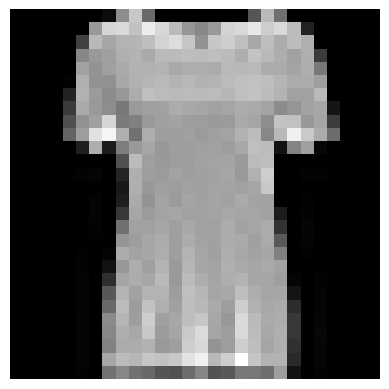

In [2]:
import matplotlib.pyplot as pp


# Display the 11th image
pp.imshow(tr_im[10], cmap='gray')
pp.axis('off')
pp.show()

# Q4) Normalize your data (train and test) between 0 and 1. Hint: This is a grayscale image has pixel values between 0 and 255.

In [3]:
# Normalize the pixel values of the training and test images
tr_im = tr_im / 255.0
te_im = te_im / 255.0

# Q5)  Now divide the training data into two: Validation images (first 5000 images from the initial training data) and Training images (rest of the images in your initial training data).

In [4]:
# Divide the training data into validation and training sets
val_im = tr_im[:5000]
val_la = tr_la[:5000]
train_im = tr_im[5000:]
train_la = tr_la[5000:]

# Q6) Initialize the weight and bias parameters of your model.

In [5]:
import tensorflow as tf

# Initialize the weight parameters
weight_ini = tf.keras.initializers.GlorotUniform()
weights = weight_ini(shape=(2, 2))

# Initialize the bias parameters
bias_ini = tf.keras.initializers.Zeros()
biases = bias_ini(shape=(2, 2))

# Q7)  Now build the neural network model with the following characteristics,

a) One Flatten layer as the input layer.

b) Two dense relu layers as hidden layers.

c) A dense softmax layer as the output layer.

In [6]:
# Define the model
n_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer as the input layer
    tf.keras.layers.Dense(256, activation='relu'),  # First dense relu layer
    tf.keras.layers.Dense(128, activation='relu'),  # Second dense relu layer
    tf.keras.layers.Dense(10, activation='softmax')  # Dense softmax layer as the output layer
])

# Q8) Answer the following questions.

a) What is the use of Flatten layer?

Ans) The Flatten layer is used to convert multidimensional input data into a one-dimensional array.

b)  Generally, softmax activation function is used in the output layer of the classification networks. Why?

Ans) Because it produces a probability distribution over multiple classes.

# Q9) Print the summary of the network.

In [7]:
# Print the model summary
n_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Q10) Now compile the model with the desired loss function, optimizer and metrics.

In [8]:
# Compile the model
n_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Q11) Now train your model on the training data and validate your model.

In [9]:
# Train the model
history = n_model.fit(tr_im, tr_la, validation_data=(val_im, val_la),
                    epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.4753 - accuracy: 0.8293 - val_loss: 0.3515 - val_accuracy: 0.8740
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3568 - accuracy: 0.8691 - val_loss: 0.3168 - val_accuracy: 0.8872
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3232 - accuracy: 0.8806 - val_loss: 0.2863 - val_accuracy: 0.8934
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3002 - accuracy: 0.8873 - val_loss: 0.2732 - val_accuracy: 0.8982
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2818 - accuracy: 0.8943 - val_loss: 0.2614 - val_accuracy: 0.9024
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2688 - accuracy: 0.9000 - val_loss: 0.2509 - val_accuracy: 0.9060
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2549 - accuracy: 0.9030 - val_loss: 0.2379 - val_ac

# Q12) Evaluate your model on the test data. What is the accuracy of your model on the test data?

In [10]:
# Evaluate the model on the test data
loss, accuracy = n_model.evaluate(te_im, te_la)

# Print the accuracy
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))

313/313 [==============================] - 0s 971us/step - loss: 0.3377 - accuracy: 0.8874
Accuracy on test data: 88.74%


# Q13) Now take the first five samples of test data. Print the actual target classes and the predicted target classes of those five samples.

In [11]:
import numpy as np
# Predict target classes for the first five samples
pred = n_model.predict(te_im[:5])

# Convert predicted probabilities to target classes
pred_cl = tf.argmax(pred, axis=1).numpy()

# Print actual and predicted target classes
print("Actual target classes:")
print(te_la[:5])
print("\nPredicted target classes:")
print(pred_cl)

1/1 [==============================] - 0s 188ms/step
Actual target classes:
[9 2 1 1 6]

Predicted target classes:
[9 2 1 1 6]
